In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

Set file to look at containing data

#Import excel file into pandas dataframe

In [5]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/SWData.csv'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

g7 = pd.read_csv(filepath, parse_dates=['Date'])
g7.head()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/SWData.csv


,Round,Centre,Date,OPRatio
0,1,1,1993-10-07,1.005008
1,1,2,1993-11-16,1.011988
2,1,3,1993-08-25,1.001176
3,1,4,1993-12-21,1.007500
4,1,5,1993-11-04,1.009018


#Calculate some stats & check data types

In [6]:
mean = np.mean(g7) # this needs to be energy specific
sd = np.std(g7)

g7.describe()
g7.dtypes

#g7.groupby(['Round'])['Centre'].nunique().reset_index() # number of unique dates = number of visits

g7.describe()

,Round,Centre,OPRatio
count,148.000000,148.000000,148.000000
mean,7.418919,5.876351,0.999597
std,3.822621,2.884355,0.007324
min,1.000000,1.000000,0.974000
25%,4.000000,4.000000,0.996000
50%,8.000000,6.000000,1.000000
75%,11.000000,8.100000,1.005506
max,13.000000,11.100000,1.014468


#Make some quick graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05E95650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0604B390>]], dtype=object)

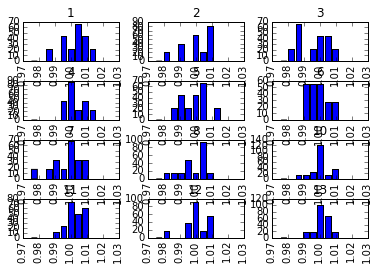

In [7]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('0.975')
range_upper = Decimal('1.025')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

g7['OPRatio'].hist(by=g7['Round'], normed=True, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

#Histograms

##Ideally make into a function and feed data frame, title, filename

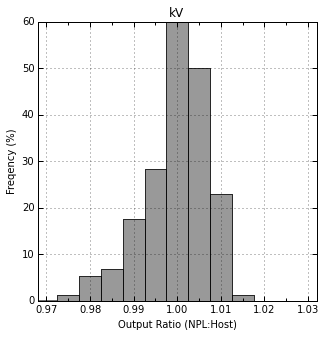

In [8]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

plotdata = g7

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('kV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

plotdata['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean =plotdata['OPRatio'].mean()
sd = plotdata['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
#plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('G7/G7_All_Hist.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [9]:
print('Skew')
print(plotdata['OPRatio'].skew())
print()
print('SEM')
print(plotdata['OPRatio'].sem())
print()
print('Mean')
print(plotdata['OPRatio'].mean())
print()
print('SD')
print(plotdata['OPRatio'].std())
print()
from scipy import stats
print('Skew Test')
print(stats.skewtest(plotdata['OPRatio']))

Skew
-0.847934367388

SEM
0.000601994567468

Mean
0.999596776378

SD
0.00732357999688

Skew Test
(-3.8742949046260131, 0.00010693385700123162)


#Plot of All Audits

In [10]:
# Calculate rolling SD of 20 values

data_datesort = plotdata.sort(['Date'], ascending=True) #Sort by date and energy and put into new dataframe
#mv_data_datesort.append('SD_Prev20')

m = data_datesort     # to allow shorter references to dataframes

m['SD_Prev20'] = np.nan
m['SD_Prev20'] = pd.rolling_std(m['OPRatio'],window=20)

m.head()


,Round,Centre,Date,OPRatio,SD_Prev20
5,1,6,1993-07-07,0.987283,NaN
2,1,3,1993-08-25,1.001176,NaN
0,1,1,1993-10-07,1.005008,NaN
4,1,5,1993-11-04,1.009018,NaN
1,1,2,1993-11-16,1.011988,NaN


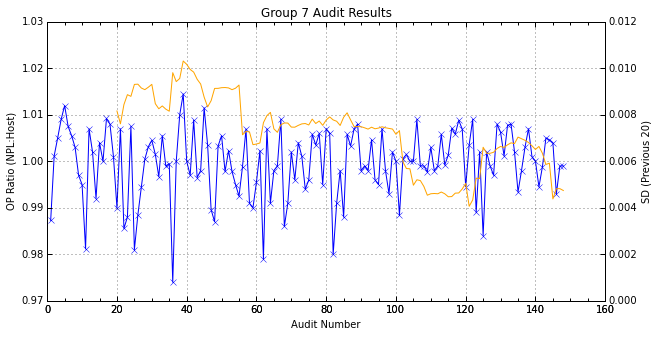

In [11]:
#m = mv_data_datesort

pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('Group 7 Audit Results')
plt.xlabel("Audit Number")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97, 1.03)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x=np.arange(1,m['OPRatio'].count()+1)
y=m['OPRatio']
#yerr=(m['OPError']*m['OPRatio'])/100

ysd=m['SD_Prev20']

#plt.errorbar(x, y, ecolor='black')
axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
axes2.yaxis.tick_right()
axes2.yaxis.set_label_position('right')
plt.ylim(0, 0.012)
plt.ylabel("SD (Previous 20)")
line2=axes2.plot(x,ysd, color='orange')
line1=axes1.plot(x,y, '-x', color='blue')

#plt.savefig('G7/G7_All_audits.png', bbox_inches='tight', dpi=300)

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

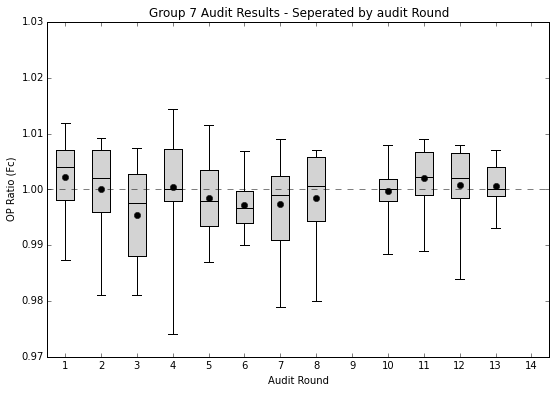

In [12]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

#m = mv_data_datesort

g1 = m.loc[m['Round']==1, ['OPRatio']]
g2 = m.loc[m['Round']==2, ['OPRatio']]
g3 = m.loc[m['Round']==3, ['OPRatio']]
g4 = m.loc[m['Round']==4, ['OPRatio']]
g5 = m.loc[m['Round']==5, ['OPRatio']]
g6 = m.loc[m['Round']==6, ['OPRatio']]
g7 = m.loc[m['Round']==7, ['OPRatio']]
g8 = m.loc[m['Round']==8, ['OPRatio']]
g9 = m.loc[m['Round']==9, ['OPRatio']]
g10 = m.loc[m['Round']==10, ['OPRatio']]
g11 = m.loc[m['Round']==11, ['OPRatio']]
g12 = m.loc[m['Round']==12, ['OPRatio']]
g13 = m.loc[m['Round']==13, ['OPRatio']]
g14 = m.loc[m['Round']==14, ['OPRatio']]

grouped=[g1,g2,g3,g4,g5,g6,g7,g8,g9, g10, g11, g12, g13, g14] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
plt.plot([-1,20],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('Group 7 Audit Results - Seperated by audit Round')
plt.xlabel("Audit Round")
plt.ylabel("OP Ratio (Fc)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('G7/G7_All_Rounds.png', bbox_inches='tight', dpi=300)


Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

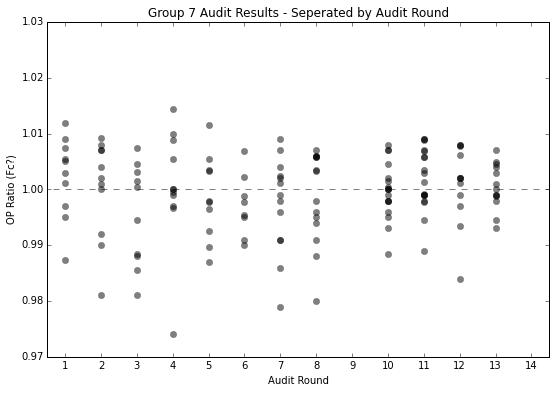

In [13]:
fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14])

one = plt.plot([0,20],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

plt.xlim(0.5,14.5)
plt.ylim(0.97,1.03)
plt.title('Group 7 Audit Results - Seperated by Audit Round')
plt.xlabel("Audit Round")
plt.ylabel("OP Ratio (Fc?)")

##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='grey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('G7/G7_All_Rounds_Scat.png', bbox_inches='tight', dpi=300)

   #Split data into 2 year intervals

In [14]:
plotdata.groupby('Round').describe()


Centre    OPRatio
Round                            
1     count  10.000000  10.000000
      mean    5.500000   1.002249
      std     3.027650   0.007395
      min     1.000000   0.987283
      25%     3.250000   0.998047
      50%     5.500000   1.004003
      75%     7.750000   1.007001
      max    10.000000   1.011988
2     count  11.000000  11.000000
      mean    5.554545   1.000124
      std     2.877973   0.008870
      min     1.000000   0.981156
      25%     3.500000   0.996000
      50%     6.000000   1.001995
      75%     7.500000   1.006998
      max    10.000000   1.009217
3     count  10.000000  10.000000
      mean    5.500000   0.995467
      std     3.027650   0.009188
      min     1.000000   0.981000
      25%     3.250000   0.988125
      50%     5.500000   0.997488
      75%     7.750000   1.002736
      max    10.000000   1.007500
4     count  11.000000  11.000000
      mean    5.645455   1.000457
      std     2.912512   0.010550
      min     1.000000   0.974000
      25%     3.500000   0.998000
      50%     6.000000   1.000000
...                ...        ...
10    std     3.075180   0.005005
      min     1.000000   0.988424
      25%     4.125000   0.998000
      50%     5.550000   1.000000
      75%     8.075000   1.001880
      max    11.100000   1.008000
11    count  18.000000  18.000000
      mean    5.516667   1.001990
      std     2.813884   0.005538
      min     1.000000   0.989000
      25%     3.025000   0.999000
      50%     6.050000   1.002175
      75%     8.075000   1.006668
      max     9.100000   1.009000
12    count  12.000000  12.000000
      mean    7.291667   1.000875
      std     2.191495   0.007009
      min     3.000000   0.984000
      25%     5.775000   0.998500
      50%     7.550000   1.002000
      75%     9.025000   1.006607
      max    10.100000   1.008000
13    count  13.000000  13.000000
      mean    5.953846   1.000537
      std     3.478653   0.004126
      min     1.000000   0.993000
      25%     3.000000   0.998837
      50%     6.100000   1.000000
      75%     8.100000   1.004000
      max    11.000000   1.007000

[96 rows x 2 columns]

##Add some things ont eh end to see if it syncs with GitHub

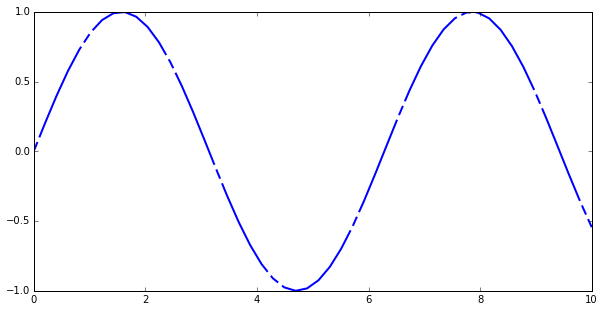

In [17]:
x = np.linspace(0, 10)
line, = plt.plot(x, np.sin(x), '--', linewidth=2)

dashes = [10, 5, 100, 5] # 10 points on, 5 off, 100 on, 5 off
line.set_dashes(dashes)

